# Several Approaches to a Tricky Regression Problem

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# To plot pretty figures and save figures
%matplotlib inline
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Create two training sets

Build two training sets, one with just a bunch of points X chosen randomly between +/- 10 and their correct y values and one where the y values have added Gaussian noise like the examples earlier in the chapter. Use a variance of 0.15 for your noise by multiplying the result of np.random.randn() by 0.15. So you'll have one X and two different labels (y's), we'll call the them clean labels and the noisy labels.

Saving figure logistic_function_plot


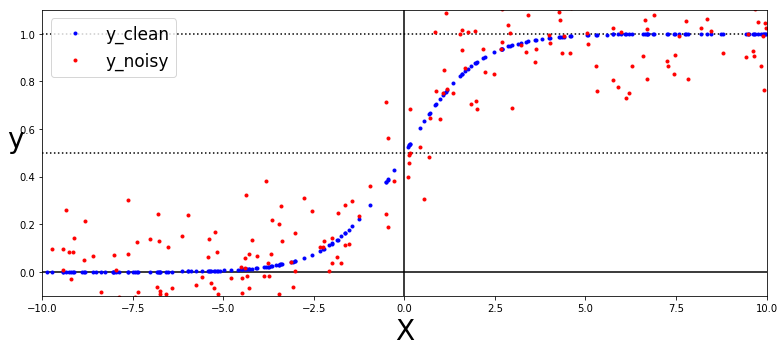

In [31]:
size = 200

X = 20 * np.random.rand(size, 1) - 10
fn = 1 / (1 + np.exp(-X))
y_clean = fn
y_noisy = y_clean + np.random.randn(size, 1) * 0.15

plt.figure(figsize=(11, 5))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_clean, "b.", label = "y_clean")
plt.legend(loc="best", fontsize=17)
plt.plot(X, y_noisy, "r.", label="y_noisy")
plt.legend(loc="best", fontsize=17)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("logistic_function_plot")
plt.show()

In [27]:
print(X.shape, y_clean.shape, y_noisy.shape)

(200, 1) (200, 1) (200, 1)


Begin by training two linear models (one each on the clean and noisy labels) and measuring their RMSE - these will be our baseline models. In all of what follows, you'll be building and training pairs of (clean, noisy) models and evaluating both.

In [34]:
# Linear Regression model for clean y
reg_clean = LinearRegression().fit(X, y_clean)
y_clean_predict = reg_clean.predict(X)

# Linear Regression model for noisy y
reg_noisy = LinearRegression().fit(X, y_noisy)
y_noisy_predict = reg_noisy.predict(X)

print(y_clean_predict.shape, y_noisy_predict.shape)

(200, 1) (200, 1)


Saving figure Clean Data Linear Regression


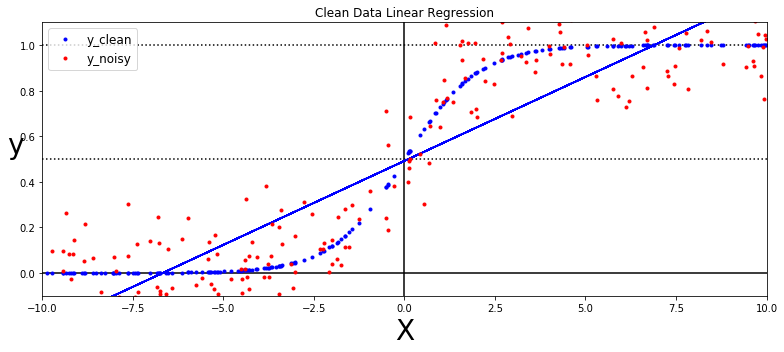

RMSE of clean data linear regression model is: 0.161498


In [41]:
rmse_clean = (mean_squared_error(y_clean, y_clean_predict))**(1/2)
rmse_noisy= (mean_squared_error(y_noisy, y_noisy_predict))**(1/2)

plt.figure(figsize=(11, 5))
plt.title("Clean Data Linear Regression")
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_clean, "b.", label = "y_clean")
plt.plot(X, y_clean_predict, "-b")
plt.plot(X, y_noisy, "r.", label="y_noisy")
plt.legend(loc="best", fontsize=12)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("Clean Data Linear Regression")
plt.show()

print("RMSE of clean data linear regression model is: %f" % rmse_clean)

Saving figure Noisy Data Linear Regression


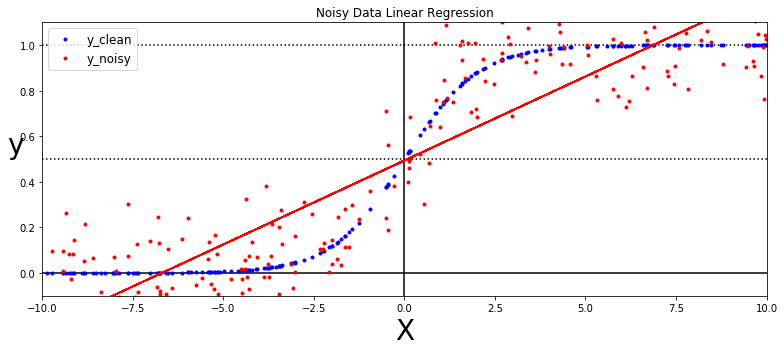

RMSE of noisy data linear regression model is: 0.223093


In [42]:
plt.figure(figsize=(11, 5))
plt.title("Noisy Data Linear Regression")
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_clean, "b.", label = "y_clean")
plt.plot(X, y_noisy, "r.", label="y_noisy")
plt.legend(loc="best", fontsize=12)
plt.plot(X, y_noisy_predict, "-r", label = "noisy data linear regression")
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("Noisy Data Linear Regression")
plt.show()

print("RMSE of noisy data linear regression model is: %f" % rmse_noisy)

## Polynomial Regression

### 1, Try building polynomial models of order 2, 3, 4, and 5 and see what kind of improvement you can get over your baselines. It's up to you to decide how to avoid overfit here, but you can't use regularization.

In [69]:
X_model = np.linspace(-10,10,size).reshape(size, 1) 

def poly_train(X, y, degree_param):

    poly = PolynomialFeatures(degree = degree_param)
    X_poly = poly.fit_transform(X)
    reg = LinearRegression().fit(X_poly, y)

    X_model_poly = poly.fit_transform(X_model)
    y_model_predict = reg.predict(X_model_poly)

    return reg, y_model_predict

**I will put all the models and predicted y values in a list**

In [71]:
y_clean_poly_predict = []
clean_models = []
y_noisy_poly_predict = []
noisy_models = []

for i in range (2, 6): 
    reg_clean, y_pred = poly_train(X, y_clean, i)
    y_clean_poly_predict.append(y_pred)
    clean_models.append(reg_clean)
    
for i in range (2, 6): 
    reg_noisy, y_pred = poly_train(X, y_noisy, i)
    y_noisy_poly_predict.append(y_pred)
    noisy_models.append(reg_noisy)

print(len(y_clean_poly_predict), len(y_noisy_poly_predict))
print(len(clean_models), len(noisy_models))

4 4
4 4


Saving figure Clean Data Polynomial Models


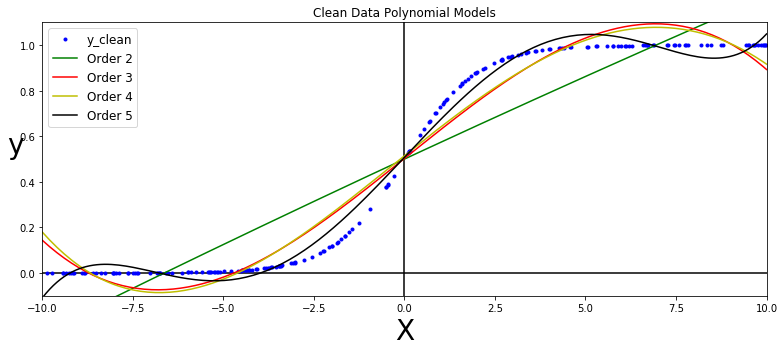

In [72]:
plt.figure(figsize=(11, 5))
plt.title("Clean Data Polynomial Models")
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_clean, "b.", label = "y_clean")
plt.plot(X_model, y_clean_poly_predict[0], "-g", label = "Order 2")
plt.plot(X_model, y_clean_poly_predict[1], "-r", label = "Order 3")
plt.plot(X_model, y_clean_poly_predict[2], "-y", label = "Order 4")
plt.plot(X_model, y_clean_poly_predict[3], "-k", label = "Order 5")
plt.legend(loc="best", fontsize=12)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("Clean Data Polynomial Models")
plt.show()

**Polynomial models of order 2, 3, 4, and 5 of clean data**

Saving figure Noisy Data Polynomial Models


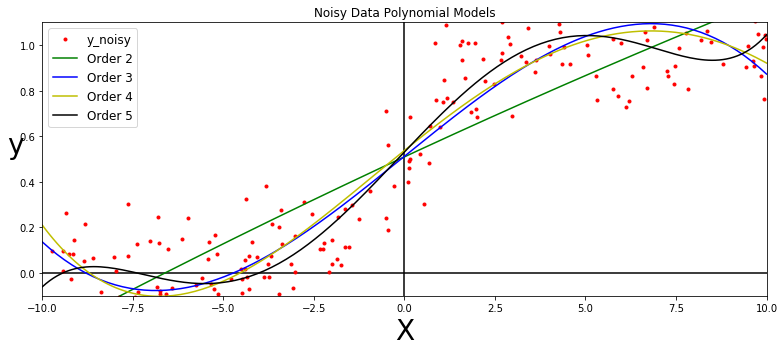

In [73]:
plt.figure(figsize=(11, 5))
plt.title("Noisy Data Polynomial Models")
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_noisy, "r.", label = "y_noisy")
plt.plot(X_model, y_noisy_poly_predict[0], "-g", label = "Order 2")
plt.plot(X_model, y_noisy_poly_predict[1], "-b", label = "Order 3")
plt.plot(X_model, y_noisy_poly_predict[2], "-y", label = "Order 4")
plt.plot(X_model, y_noisy_poly_predict[3], "-k", label = "Order 5")
plt.legend(loc="best", fontsize=12)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("Noisy Data Polynomial Models")
plt.show()

**Polynomial models of order 2, 3, 4, and 5 of clean data**

Below here I will use cross validation to check if our models overfit the data. I will have 8 folds, in each fold I will create a model of order n from the train data set, then use that model to compute the rmse of both train and test data set to see if the model overfits. The output list will have this format:

rmse_clean_order_2 = [[fold 1 train rmse, fold 1 test rmse], [fold 2 train rmse, fold 2 test rmse], [fold 3], so on]

##### Let's check RSME of clean data first

In [90]:
from sklearn.model_selection import KFold

train_test_8_fold = [] # Format: [[X_train_fold_1, y_train_fold_1, X_test_fold_1, y_test_fold_1], [fold2], [fold3], so on]
order_2 = []
kf = KFold(n_splits=8)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_clean[train_index], y_clean[test_index] # We now have 8 different train and test set
    one_fold = [X_train, y_train, X_test, y_test]
    train_test_8_fold.append(one_fold)
    
print(len(train_test_8_fold))

8


In [91]:
rmse_clean_order_2 = [] # format: [[fold 1 train rmse, fold 1 test rmse], [fold 2], [fold 3], so on]

for i in range (8):
    poly = PolynomialFeatures(degree = 2)
    X_train_poly = poly.fit_transform(train_test_8_fold[i][0]) # transform X_train
    X_test_poly = poly.fit_transform(train_test_8_fold[i][3]) # transform X_test
    reg = LinearRegression().fit(X_train_poly, train_test_8_fold[i][1]) # model

    y_train_predict = reg.predict(X_train_poly) # predict y_train
    y_test_predict = reg.predict(X_test_poly) #predict y_test
    rmse_train = (mean_squared_error(train_test_8_fold[i][1], y_train_predict))**(1/2) # compute rmse for train 
    rmse_test= (mean_squared_error(train_test_8_fold[i][3], y_test_predict))**(1/2) # compute rmse for test
    fold_i = [rmse_train, rmse_test] 
    rmse_clean_order_2.append(fold_i)

rmse_clean_order_2

[[0.1591930905257834, 0.416046780349313],
 [0.16034174307245272, 0.4337789242166032],
 [0.1614062651037332, 0.4023453743501744],
 [0.16014648950767915, 0.40831472411938335],
 [0.16236712609319437, 0.42396084993561656],
 [0.16426934717358826, 0.4600390295655487],
 [0.16386045023739446, 0.4094745435346361],
 [0.15686445782910857, 0.4133663565306881]]

We can see that at all folds, the rmse of train set is much lower than that of test set, so order 2 overfit our data. 
This cell took me more than an hour but I finally got it:(. Hope it make sense

**Now we can try to do the same for order 3,4,5**

In [92]:
rmse_clean_order_3, rmse_clean_order_4, rmse_clean_order_5 = [], [], []
rmse_clean_order_n = [rmse_clean_order_3, rmse_clean_order_4, rmse_clean_order_5]

for k in range (3,6):
    for i in range (8):
        poly = PolynomialFeatures(degree = k)
        X_train_poly = poly.fit_transform(train_test_8_fold[i][0]) # transform X_train
        X_test_poly = poly.fit_transform(train_test_8_fold[i][3]) # transform X_test
        reg = LinearRegression().fit(X_train_poly, train_test_8_fold[i][1]) # model

        y_train_predict = reg.predict(X_train_poly) # predict y_train
        y_test_predict = reg.predict(X_test_poly) #predict y_test
        rmse_train = (mean_squared_error(train_test_8_fold[i][1], y_train_predict))**(1/2) # compute rmse for train 
        rmse_test= (mean_squared_error(train_test_8_fold[i][3], y_test_predict))**(1/2) # compute rmse for test
        fold_i = [rmse_train, rmse_test] 
        rmse_clean_order_n[k-3].append(fold_i)

    print("RMSE of order %d" %k)
    print(*rmse_clean_order_n[k-3], sep = ", ")

RMSE of order 3
[0.078521104832912, 0.3977774108346941], [0.07905372577840615, 0.41755498351646453], [0.07788086855621983, 0.3775658165508637], [0.07745040050050668, 0.38990131873055], [0.07903624214252714, 0.406703961214322], [0.08019022666374301, 0.44613492422872775], [0.07876590396177462, 0.3902659732139922], [0.07681531505012935, 0.39200280083194866]
RMSE of order 4
[0.07745033162809883, 0.40169828854283346], [0.07841149455481516, 0.42204824365935245], [0.0776185824932995, 0.37799136525083127], [0.07608904998604041, 0.39406571507825117], [0.07803999445701294, 0.4114578522860976], [0.0792523599790113, 0.4537505187971552], [0.07826498662349578, 0.39275856910744444], [0.07641789645391099, 0.393357549074439]
RMSE of order 5
[0.039594930684454, 0.38669402982804024], [0.04017517228614987, 0.4089403884255668], [0.039976908478913005, 0.3624284146071583], [0.03868781123578076, 0.37888419287675085], [0.039589490521557705, 0.39816419172592316], [0.04055249652490178, 0.44175083228852663], [0.0

**This make sense because there higher order we go up, the better our model fit the train data set, so the rmse of train is  getting lower. However, the rmse of test dataset are always around 0.39, which is much higher the the rmse of train data set. This indicates overfitting**

#####  Now let's check rmse of our test data

In [93]:
train_test_8_fold_noisy = [] # Format: [[X_train_fold_1, y_train_fold_1, X_test_fold_1, y_test_fold_1], [fold2], [fold3], so on]

kf_noisy = KFold(n_splits=8)

for train_index, test_index in kf_noisy.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_noisy[train_index], y_noisy[test_index] # We now have 8 different train and test set
    one_fold = [X_train, y_train, X_test, y_test]
    train_test_8_fold_noisy.append(one_fold)
    
print(len(train_test_8_fold_noisy))

8


In [94]:
rmse_noisy_order_2, rmse_noisy_order_3, rmse_noisy_order_4, rmse_noisy_order_5 = [], [], [], []
rmse_noisy_order_n = [rmse_noisy_order_2, rmse_noisy_order_3, rmse_noisy_order_4, rmse_noisy_order_5]

for k in range (2,6):
    for i in range (8):
        poly = PolynomialFeatures(degree = k)
        X_train_poly = poly.fit_transform(train_test_8_fold_noisy[i][0]) # transform X_train
        X_test_poly = poly.fit_transform(train_test_8_fold_noisy[i][3]) # transform X_test
        reg = LinearRegression().fit(X_train_poly, train_test_8_fold_noisy[i][1]) # model

        y_train_predict = reg.predict(X_train_poly) # predict y_train
        y_test_predict = reg.predict(X_test_poly) #predict y_test
        rmse_train = (mean_squared_error(train_test_8_fold_noisy[i][1], y_train_predict))**(1/2) # compute rmse for train 
        rmse_test= (mean_squared_error(train_test_8_fold_noisy[i][3], y_test_predict))**(1/2) # compute rmse for test
        fold_i = [rmse_train, rmse_test] 
        rmse_noisy_order_n[k-3].append(fold_i)

    print("RMSE of order %d" %k)
    print(*rmse_noisy_order_n[k-3], sep = ", ")

RMSE of order 2
[0.22203098327817397, 0.4435945476136236], [0.21584114164001889, 0.4876005560625173], [0.2239082596586559, 0.4246549638989674], [0.22112940793528096, 0.46035663004469807], [0.22180020548916698, 0.3898994942686971], [0.2273431096005008, 0.46188934489192024], [0.2203431881268355, 0.44971671148481673], [0.22523922214341466, 0.4455151033940281]
RMSE of order 3
[0.1696195291048913, 0.42523995051120494], [0.17227699708819436, 0.47135830280357216], [0.1699203026275827, 0.4010343279461951], [0.1723218771659959, 0.44027384341543174], [0.17086148193059833, 0.3730205192664645], [0.17411313633847128, 0.44580185693309293], [0.16240230937398803, 0.4259838834068763], [0.1657927612587113, 0.4215721415909831]
RMSE of order 4
[0.167055226680587, 0.4367140636867357], [0.17110624279618472, 0.48163526994162], [0.16912524764370052, 0.40372403828543557], [0.17019240504745772, 0.44923312735264903], [0.17022263795197914, 0.37780223117735307], [0.1718193208099503, 0.46160092599865565], [0.161388

**We see the same pattern here in the noisy data set**

### 2, Now try the same thing, but this time do use regularization - you can pick which type, but don't do anything else to avoid overfit. Can you improve on your previous result?

In [99]:
from sklearn.linear_model import Lasso

rmse_clean_lasso = []

for i in range (8):
    lasso = Lasso(alpha=0.1)
    lasso_reg = Lasso().fit(train_test_8_fold[i][0], train_test_8_fold[i][1]) # model

    y_train_predict = lasso_reg.predict(train_test_8_fold[i][0]) # predict y_train
    y_test_predict = lasso_reg.predict( train_test_8_fold[i][2]) #predict y_test
    rmse_train = (mean_squared_error(train_test_8_fold[i][1], y_train_predict))**(1/2) # compute rmse for train 
    rmse_test= (mean_squared_error(train_test_8_fold[i][3], y_test_predict))**(1/2) # compute rmse for test
    fold_i = [rmse_train, rmse_test] 
    rmse_clean_lasso.append(fold_i)

print("RMSE of Lasso")
print(*rmse_clean_lasso, sep = ", ")


RMSE of Lasso
[0.23801450633434088, 0.24489972743115715], [0.23886661494956948, 0.24486895487686147], [0.23984543788646578, 0.23406358313667122], [0.23831633892230888, 0.23825426716088277], [0.24152592804443726, 0.2248741103431043], [0.2428871275674054, 0.23831505522503504], [0.24098645999404933, 0.22784172186794577], [0.23433706046527655, 0.2707705134651737]


**Alright it's much better using Lasso. We can see the the rmse of our train and test are roughly equal, which means our model did a good job of fitting the train dataset**

Let's see our Lasso model

In [100]:
lasso_reg

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### 3, Try building polynomial models of order 20 and use LASSO regularization. Show the models and see how many coefficients end up as 0.


##### Try on clean data

In [108]:
poly_20 = PolynomialFeatures(degree = 20)
X_poly_20 = poly_20.fit_transform(X)
lasso_20 = Lasso().fit(X_poly_20, y_clean)

X_model_poly_20 = poly_20.fit_transform(X_model)
y_model_predict = lasso_20.predict(X_model_poly_20)
y_pred_lasso20 = lasso_20.predict(X_poly_20)

lasso_20.coef_

C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.97040944e-03,
       -9.84832950e-05, -1.03050319e-04,  2.26863236e-06,  9.29795383e-08,
       -8.65684260e-10,  3.12698410e-09, -1.09190386e-10,  2.17867556e-11,
       -8.44277368e-13,  8.73752266e-14, -3.44132869e-15, -1.61164803e-16,
        9.97155173e-18, -8.70465156e-18,  4.20864502e-19, -1.31797254e-19,
        6.25644409e-21])

Only 3 coeffs are 0. I expected more than that actually

Saving figure Lasso order 20


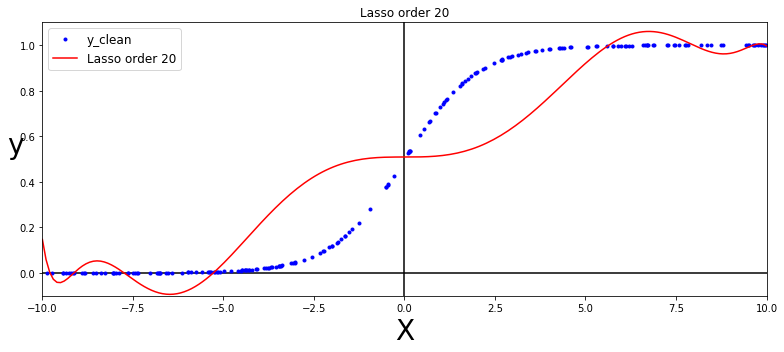

In [109]:
plt.figure(figsize=(11, 5))
plt.title("Lasso order 20")
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_clean, "b.", label = "y_clean")
plt.plot(X_model, y_model_predict, "-r", label = "Lasso order 20")
plt.legend(loc="best", fontsize=12)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("Lasso order 20")
plt.show()

##### Now try with noisy data

In [110]:
lasso_20_noisy = Lasso().fit(X_poly_20, y_noisy)

y_model_predict_lasso20_noisy = lasso_20_noisy.predict(X_model_poly_20)
y_pred_lasso20_noisy = lasso_20_noisy.predict(X_poly_20)

lasso_20_noisy.coef_

C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.74434668e-03,
       -1.25083937e-04, -9.80403148e-05,  2.19470992e-06,  1.24457229e-07,
       -2.47915974e-10,  2.92321559e-09, -7.19730256e-11,  1.67623575e-11,
       -3.38817157e-13,  3.85944968e-14,  3.97692683e-16, -3.83113597e-16,
        1.63613906e-17, -6.71010009e-18,  5.18353895e-20, -6.26499363e-20,
       -2.15599678e-21])

Saving figure Lasso Noisy order 20


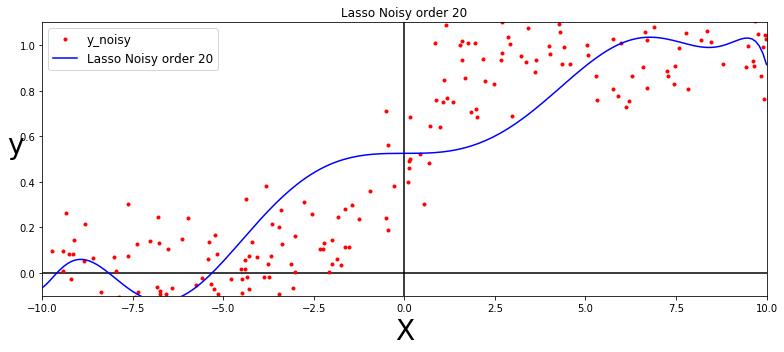

In [111]:
plt.figure(figsize=(11, 5))
plt.title("Lasso Noisy order 20")
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_noisy, "r.", label = "y_noisy")
plt.plot(X_model, y_model_predict_lasso20_noisy, "-b", label = "Lasso Noisy order 20")
plt.legend(loc="best", fontsize=12)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("Lasso Noisy order 20")
plt.show()

## Other Regression Algorithms

#### Look ahead to Chapter 5 (p. 164) at using support vector machines for regression. Try building SVR models with polynomial kernels - you can pick what degree to use. Compare the results to the baselines.

##### Clean data

In [114]:
from sklearn.svm import SVR

svr = SVR(kernel = 'poly', degree = 2)
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X)
svr.fit(X_poly_2, y_clean)

X_model_poly_2 = poly_2.fit_transform(X_model)
y_model_predict_2_clean = svr.predict(X_model_poly_2)
y_pred_svr_2_clean = svr.predict(X_poly_2)


rmse_svr_2_clean = (mean_squared_error(y_clean, y_pred_svr_2_clean))**(1/2)
print("The RMSE of clean data SVR with order 2 is: %f" %rmse_svr_2_clean)

C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The RMSE of clean data SVR with order 2 is: 0.087615


Wow pretty impressive with the rsme of 0.0876, which is much better than the baseline already

RMSE of clean data linear regression model is: 0.161498

Saving figure SVR Clean Order 2


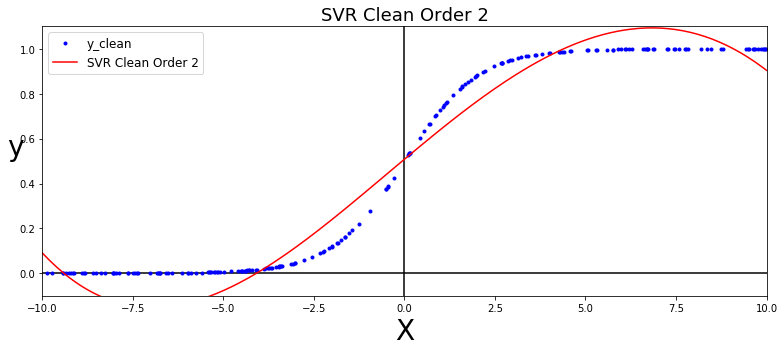

In [113]:
plt.figure(figsize=(11, 5))
plt.title("SVR Clean Order 2", fontsize = 18)
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_clean, "b.", label = "y_clean")
plt.plot(X_model, y_model_predict_2_clean, "-r", label = "SVR Clean Order 2")
plt.legend(loc="best", fontsize=12)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("SVR Clean Order 2")
plt.show()

I will keep it at order 2 because from order 3 and above it will probably be overfitting 

##### Noisy data

In [115]:
svr.fit(X_poly_2, y_noisy)

y_model_predict_2_noisy = svr.predict(X_model_poly_2)
y_pred_svr_2_noisy = svr.predict(X_poly_2)

rmse_svr_2_noisy = (mean_squared_error(y_noisy, y_pred_svr_2_noisy))**(1/2)
print("The RMSE of noisy data SVR with order 2 is: %f" %rmse_svr_2_noisy)

C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\minhv\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The RMSE of clean data SVR with order 2 is: 0.359514


Do not do so well with noisy data

RMSE of noisy data linear regression model is: 0.223093

Saving figure SVR Noisy Order 2


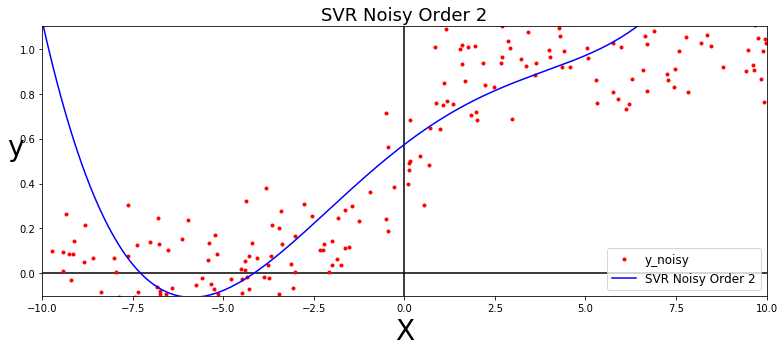

In [116]:
plt.figure(figsize=(11, 5))
plt.title("SVR Noisy Order 2", fontsize = 18)
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y_noisy, "r.", label = "y_noisy")
plt.plot(X_model, y_model_predict_2_noisy, "-b", label = "SVR Noisy Order 2")
plt.legend(loc="best", fontsize=12)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("X", fontsize = 28)
plt.ylabel("y", rotation=0, fontsize = 28)
save_fig("SVR Noisy Order 2")
plt.show()

#### Look even further ahead to Chapter 6 (p. 183) at using decision trees for regression. Build trees with several depths (but no more than 10). Compare the results to the baselines.

In [120]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor_2 = DecisionTreeRegressor(random_state=0, max_depth=2)
decision_tree_regressor_4 = DecisionTreeRegressor(random_state=0, max_depth=4)
decision_tree_regressor_6 = DecisionTreeRegressor(random_state=0, max_depth=6)
decision_tree_regressor_8 = DecisionTreeRegressor(random_state=0, max_depth=8)
decision_tree_regressor_10 = DecisionTreeRegressor(random_state=0, max_depth=10)


##### Try it on clean data

In [121]:
decision_tree_regressor_2.fit(X, y_clean)
decision_tree_regressor_4.fit(X, y_clean)
decision_tree_regressor_6.fit(X, y_clean)
decision_tree_regressor_8.fit(X, y_clean)
decision_tree_regressor_10.fit(X, y_clean)

y_model_predict_tree_2 = decision_tree_regressor_2.predict(X_model)
y_model_predict_tree_4 = decision_tree_regressor_4.predict(X_model)
y_model_predict_tree_6 = decision_tree_regressor_6.predict(X_model)
y_model_predict_tree_8 = decision_tree_regressor_8.predict(X_model)
y_model_predict_tree_10 = decision_tree_regressor_10.predict(X_model)

y_clean_predict_tree_2 = decision_tree_regressor_2.predict(X)
y_clean_predict_tree_4 = decision_tree_regressor_4.predict(X)
y_clean_predict_tree_6 = decision_tree_regressor_6.predict(X)
y_clean_predict_tree_8 = decision_tree_regressor_8.predict(X)
y_clean_predict_tree_10 = decision_tree_regressor_10.predict(X)

rmse_tree_clean_2 = (mean_squared_error(y_clean, y_clean_predict_tree_2))**(1/2)
rmse_tree_clean_4 = (mean_squared_error(y_clean, y_clean_predict_tree_4))**(1/2)
rmse_tree_clean_6 = (mean_squared_error(y_clean, y_clean_predict_tree_6))**(1/2)
rmse_tree_clean_8 = (mean_squared_error(y_clean, y_clean_predict_tree_8))**(1/2)
rmse_tree_clean_10 = (mean_squared_error(y_clean, y_clean_predict_tree_10))**(1/2)

print("The RMSE of clean data using Decision Treet Regressor with max depth of 2 is: %f" %rmse_tree_clean_2)
print("The RMSE of clean data using Decision Treet Regressor with max depth of 4 is: %f" %rmse_tree_clean_4)
print("The RMSE of clean data using Decision Treet Regressor with max depth of 6 is: %f" %rmse_tree_clean_6)
print("The RMSE of clean data using Decision Treet Regressor with max depth of 8 is: %f" %rmse_tree_clean_8)
print("The RMSE of clean data using Decision Treet Regressor with max depth of 10 is: %f" %rmse_tree_clean_10)

The RMSE of clean data using Decision Treet Regressor with max depth of 2 is: 0.052743
The RMSE of clean data using Decision Treet Regressor with max depth of 4 is: 0.009577
The RMSE of clean data using Decision Treet Regressor with max depth of 6 is: 0.001627
The RMSE of clean data using Decision Treet Regressor with max depth of 8 is: 0.000210
The RMSE of clean data using Decision Treet Regressor with max depth of 10 is: 0.000162


**So we can see that with just the depth of 2, we already have a better rsme than the baseline. We can be pretty sure that the max depth of 3 and above are overfit**

Saving figure DecisionTreeReg Clean 2


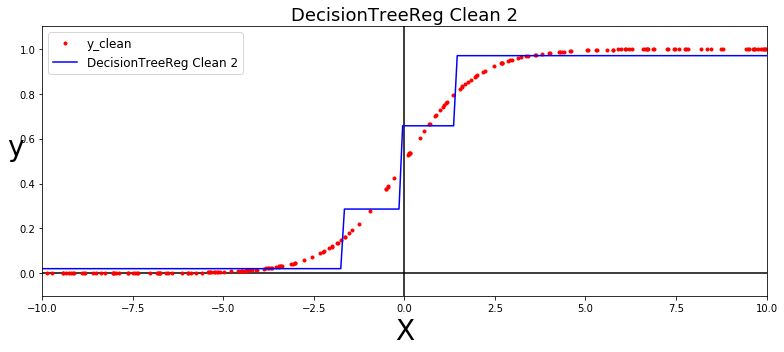

Saving figure DecisionTreeReg Clean 4


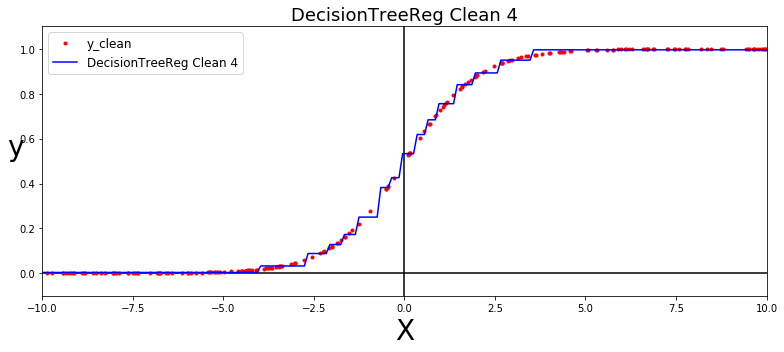

Saving figure DecisionTreeReg Clean 6


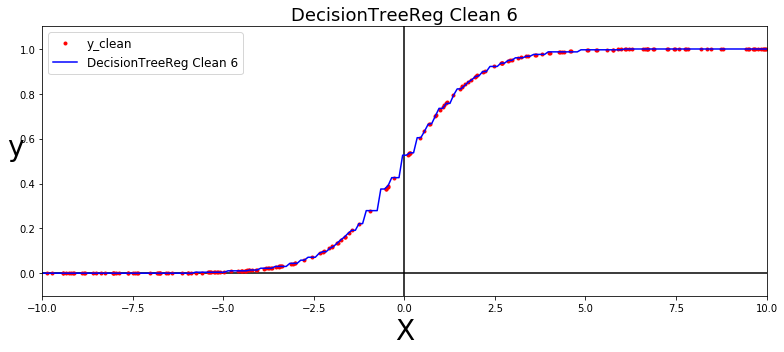

Saving figure DecisionTreeReg Clean 8


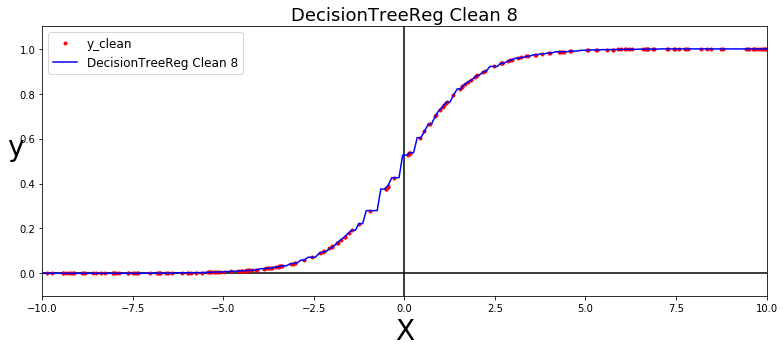

Saving figure DecisionTreeReg Clean 10


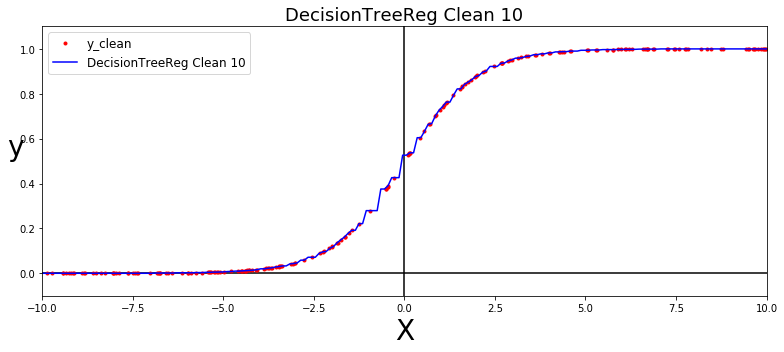

In [123]:
y_model_predict_tree_i = [y_model_predict_tree_2,y_model_predict_tree_4,y_model_predict_tree_6,y_model_predict_tree_8,y_model_predict_tree_10]

for i in range (1,6):
    plt.figure(figsize=(11, 5))
    plt.title("DecisionTreeReg Clean %d" %(i*2), fontsize = 18)
    plt.plot([-10, 10], [0, 0], "k-")
    plt.plot([0, 0], [-1.1, 1.1], "k-")
    plt.plot(X, y_clean, "r.", label = "y_clean")
    plt.plot(X_model, y_model_predict_tree_i[i-1], "-b", label = "DecisionTreeReg Clean %d" %(i*2))
    plt.legend(loc="best", fontsize=12)
    plt.axis([-10, 10, -0.1, 1.1])
    plt.xlabel("X", fontsize = 28)
    plt.ylabel("y", rotation=0, fontsize = 28)
    save_fig("DecisionTreeReg Clean %d" %(i*2))
    plt.show()

In [124]:
from graphviz import Source
from sklearn.tree import export_graphviz


export_graphviz(
        decision_tree_regressor_2,
        out_file=os.path.join(IMAGES_PATH, "regression_tree_2.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree_2.dot"))

ModuleNotFoundError: No module named 'graphviz'

##### Try it on noisy data

In [128]:
decision_tree_regressor_2.fit(X, y_noisy)
decision_tree_regressor_4.fit(X, y_noisy)
decision_tree_regressor_6.fit(X, y_noisy)
decision_tree_regressor_8.fit(X, y_noisy)
decision_tree_regressor_10.fit(X, y_noisy)

y_model_predict_tree_2 = decision_tree_regressor_2.predict(X_model)
y_model_predict_tree_4 = decision_tree_regressor_4.predict(X_model)
y_model_predict_tree_6 = decision_tree_regressor_6.predict(X_model)
y_model_predict_tree_8 = decision_tree_regressor_8.predict(X_model)
y_model_predict_tree_10 = decision_tree_regressor_10.predict(X_model)

y_noisy_predict_tree_2 = decision_tree_regressor_2.predict(X)
y_noisy_predict_tree_4 = decision_tree_regressor_4.predict(X)
y_noisy_predict_tree_6 = decision_tree_regressor_6.predict(X)
y_noisy_predict_tree_8 = decision_tree_regressor_8.predict(X)
y_noisy_predict_tree_10 = decision_tree_regressor_10.predict(X)

rmse_tree_noisy_2 = (mean_squared_error(y_noisy, y_noisy_predict_tree_2))**(1/2)
rmse_tree_noisy_4 = (mean_squared_error(y_noisy, y_noisy_predict_tree_4))**(1/2)
rmse_tree_noisy_6 = (mean_squared_error(y_noisy, y_noisy_predict_tree_6))**(1/2)
rmse_tree_noisy_8 = (mean_squared_error(y_noisy, y_noisy_predict_tree_8))**(1/2)
rmse_tree_noisy_10 = (mean_squared_error(y_noisy, y_noisy_predict_tree_10))**(1/2)

print("The RMSE of noisy data using Decision Treet Regressor with max depth of 2 is: %f" %rmse_tree_noisy_2)
print("The RMSE of noisy data using Decision Treet Regressor with max depth of 4 is: %f" %rmse_tree_noisy_4)
print("The RMSE of noisy data using Decision Treet Regressor with max depth of 6 is: %f" %rmse_tree_noisy_6)
print("The RMSE of noisy data using Decision Treet Regressor with max depth of 8 is: %f" %rmse_tree_noisy_8)
print("The RMSE of noisy data using Decision Treet Regressor with max depth of 10 is: %f" %rmse_tree_noisy_10)

The RMSE of noisy data using Decision Treet Regressor with max depth of 2 is: 0.151192
The RMSE of noisy data using Decision Treet Regressor with max depth of 4 is: 0.138025
The RMSE of noisy data using Decision Treet Regressor with max depth of 6 is: 0.109649
The RMSE of noisy data using Decision Treet Regressor with max depth of 8 is: 0.085476
The RMSE of noisy data using Decision Treet Regressor with max depth of 10 is: 0.055411


Saving figure DecisionTreeReg Noisy 2


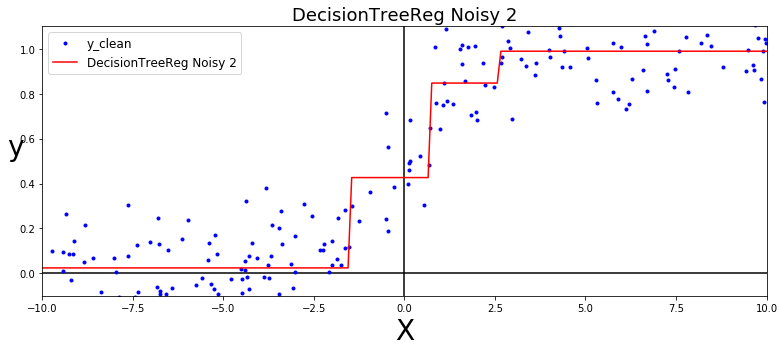

Saving figure DecisionTreeReg Noisy 4


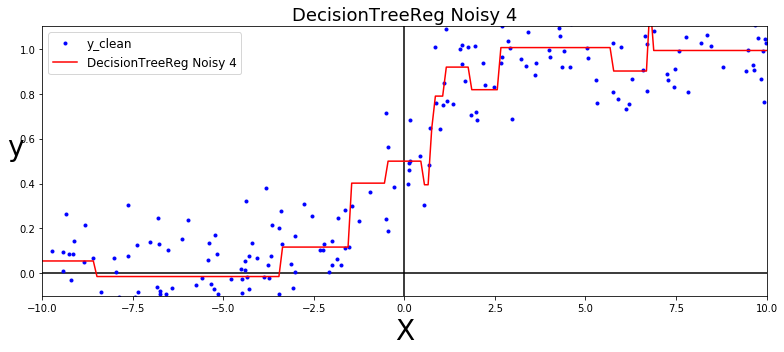

Saving figure DecisionTreeReg Noisy 6


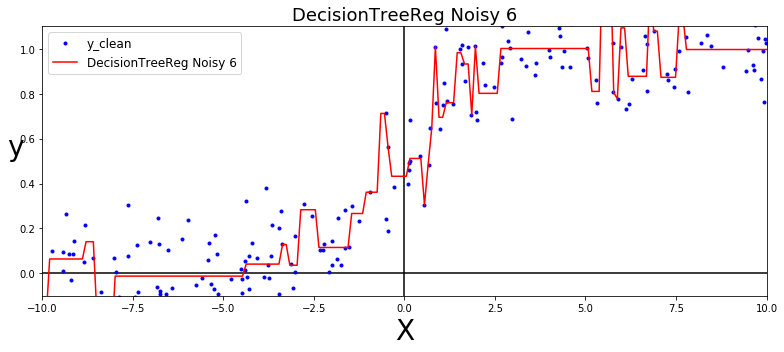

Saving figure DecisionTreeReg Noisy 8


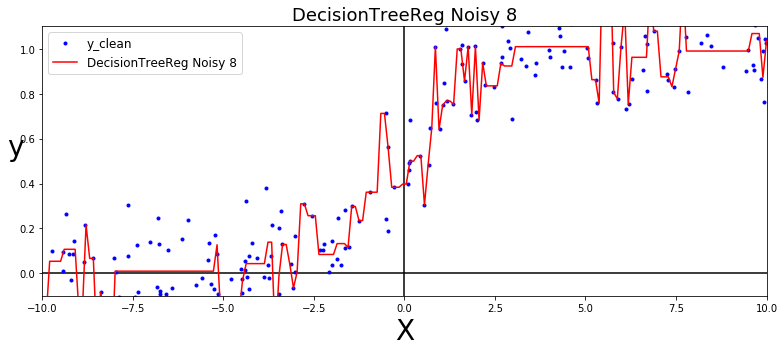

Saving figure DecisionTreeReg Noisy 10


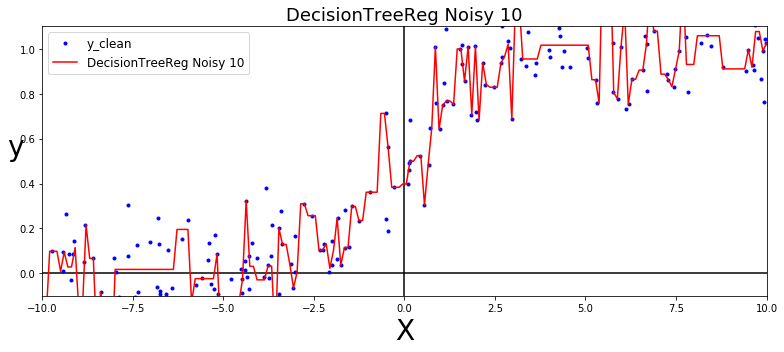

In [129]:
y_model_predict_tree_i = [y_model_predict_tree_2,y_model_predict_tree_4,y_model_predict_tree_6,y_model_predict_tree_8,y_model_predict_tree_10]

for i in range (1,6):
    plt.figure(figsize=(11, 5))
    plt.title("DecisionTreeReg Noisy %d" %(i*2), fontsize = 18)
    plt.plot([-10, 10], [0, 0], "k-")
    plt.plot([0, 0], [-1.1, 1.1], "k-")
    plt.plot(X, y_noisy, "b.", label = "y_clean")
    plt.plot(X_model, y_model_predict_tree_i[i-1], "-r", label = "DecisionTreeReg Noisy %d" %(i*2))
    plt.legend(loc="best", fontsize=12)
    plt.axis([-10, 10, -0.1, 1.1])
    plt.xlabel("X", fontsize = 28)
    plt.ylabel("y", rotation=0, fontsize = 28)
    save_fig("DecisionTreeReg Noisy %d" %(i*2))
    plt.show()